# Determining Exoplanets from Data

In this project, I take data from NASA's Kepler Space Observatory (taken from https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative0) and see how well Logistic Regression and XGBoost perform in trying to classify exoplanets in the data.

## Logistic Regression

First we try logistic regression!

In [21]:
#Get Data from csv
import pandas as pd

df = pd.read_csv("cumulative_2025.05.15_00.08.33.csv", comment='#')  # some files have metadata comments
print(df.shape)
df.head()

(9564, 141)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [22]:
#Remove candidate planets
df = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

In [23]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.070,0.110,0.080,0.130,-0.020,0.130,-0.080,0.100,0.080,0.100


In [24]:
#Create a binary is_candidate entry to classify against
df['is_candidate'] = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})

In [25]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,is_candidate
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,1
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,1
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,1
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.110,0.080,0.130,-0.020,0.130,-0.080,0.100,0.080,0.100,1


In [26]:
#Select features that look like they matter!
#In particular, we obviously ignore things like names and IDs
#Things like RA and Dec don't have an obvious connection
#to whether we expect the planet to being an exoplanet
#But with more time it may be worth seeing how the model behaves with them anyway.

features = [
    'koi_period',      # orbital period
    'koi_duration',    # transit duration
    'koi_depth',       # transit depth
    'koi_prad',        # planet radius
    'koi_steff',       # stellar temperature
    'koi_slogg',       # log surface gravity
    'koi_srad'         # stellar radius
]

#Capital X and Y
X = df[features]
Y = df['is_candidate']

In [27]:
X.head()

,koi_period,koi_duration,koi_depth,koi_prad,koi_steff,koi_slogg,koi_srad
0,9.488036,2.95750,615.8,2.26,5455.0,4.467,0.927
1,54.418383,4.50700,874.8,2.83,5455.0,4.467,0.927
3,1.736952,2.40641,8079.2,33.46,5805.0,4.564,0.791
4,2.525592,1.65450,603.3,2.75,6031.0,4.438,1.046
5,11.094321,4.59450,1517.5,3.90,6046.0,4.486,0.972


In [28]:
#No missing values please!
X = X.dropna()
Y = Y.loc[X.index]

In [30]:
#Split of 20% for testing
#Random seed given by RNG
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [31]:
#Training Data
X_train

,koi_period,koi_duration,koi_depth,koi_prad,koi_steff,koi_slogg,koi_srad
4980,54.061328,4.48223,79684.0,88.28,5786.0,4.318,1.112
5661,0.736194,1.11480,247.3,1.84,6355.0,4.418,1.090
7422,1.927178,2.77420,136140.0,28.94,5193.0,4.525,0.774
4663,412.041857,5.57200,1959.0,3.77,5485.0,4.556,0.867
6905,116.301793,2.25300,649.0,2.18,5593.0,4.552,0.842
...,...,...,...,...,...,...,...
4200,0.909315,2.20530,40.5,0.99,6508.0,4.163,1.447
7805,659.290700,22.10600,338.1,4.66,6917.0,4.050,1.837
7453,94.219289,24.31200,1025.9,2.15,4641.0,4.589,0.694
8519,501.907030,12.43000,306.9,1.83,6316.0,4.413,1.036


In [32]:
#Testing Data
X_test

,koi_period,koi_duration,koi_depth,koi_prad,koi_steff,koi_slogg,koi_srad
8900,2.680514,3.21178,195750.0,48.86,6038.0,4.356,1.076
5888,1.519529,5.16750,8372.5,11.12,6033.0,4.460,1.046
7386,12.425551,28.49200,409.0,3.79,6381.0,4.155,1.423
1439,3.003880,3.28480,8538.0,10.96,6311.0,4.398,1.172
6321,20.531171,5.67000,284.6,1.39,5398.0,4.580,0.805
...,...,...,...,...,...,...,...
6196,0.681138,2.72870,105190.0,45.75,5872.0,4.474,0.864
9011,2.214030,5.64264,349110.0,94.23,6604.0,4.178,1.526
1560,17.760765,1.66790,1287.2,1.93,3826.0,4.744,0.516
5774,6.905223,3.53300,420.3,4.54,6596.0,4.135,1.721


In [338]:
#We standardise the data. We just use standard scaling (substract mean, divide by sample variance) at first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#sklearn has built in logistic regression, so I use that
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [38]:
#How'd it do!
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7201365187713311
Confusion Matrix:
 [[734 186]
 [224 321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       920
           1       0.63      0.59      0.61       545

    accuracy                           0.72      1465
   macro avg       0.70      0.69      0.70      1465
weighted avg       0.72      0.72      0.72      1465



In [39]:
#Gets an accuracy of only 734+321/1465 ~ 0.72 huh?
#Kind of want to do better than that!

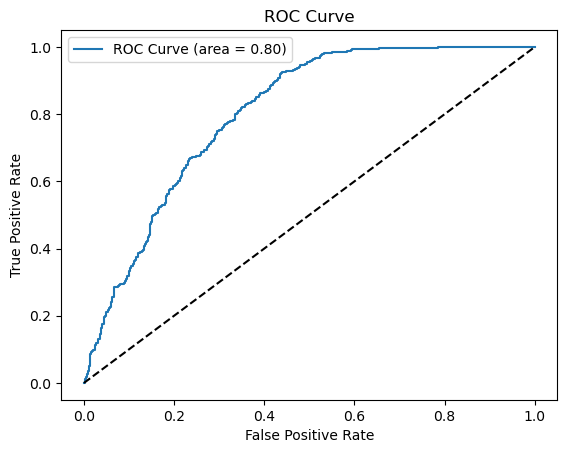

In [41]:
#Here's an ROC curve
#Area under curve is 0.8/1, not bad!
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [43]:
#Now try to figure out which features have the largest weights in the regression
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
})
print(coef_df.sort_values(by="Coefficient", key=abs, ascending=False))

        Feature  Coefficient
2     koi_depth    -5.987669
6      koi_srad    -4.876084
3      koi_prad    -4.029226
5     koi_slogg    -0.787212
4     koi_steff    -0.614741
0    koi_period    -0.361522
1  koi_duration    -0.267808


In [68]:
#Seems that the most important features are the transit depth, the radius of the planet and the radius of the star.
#Together, these factors determine the sizes of the planet and star, which seem to be the most important physical features.
#Maybe a little odd that the temperature of the star and the transit duration are not more important!

In [84]:
#Let's try and visualise how the planet and stellar radii affect the classification
#We'll consider how an input with mean values for other values
#and a chosen planetary and stellar radius is classified
import numpy as np
import matplotlib.pyplot as plt

# Get means of all features
X_means = X_test_scaled.mean(axis=0)

# Index positions for koi_depth and koi_srad in feature list
prad_idx = features.index('koi_prad')
srad_idx = features.index('koi_srad')

# Create meshgrid in koi_depth and koi_srad dimensions
x = np.linspace(X_test_scaled[:, prad_idx].min(), X_test_scaled[:, prad_idx].max()-25, 100)
y = np.linspace(X_test_scaled[:, srad_idx].min(), X_test_scaled[:, srad_idx].max()-70, 100)
xx, yy = np.meshgrid(x, y)

# Create input for prediction: vary koi_depth and koi_srad, keep others fixed
grid = np.tile(X_means, (xx.ravel().shape[0], 1))
grid[:, prad_idx] = xx.ravel()
grid[:, srad_idx] = yy.ravel()

# Predict probabilities
Z = model.predict_proba(grid)[:, 1].reshape(xx.shape)

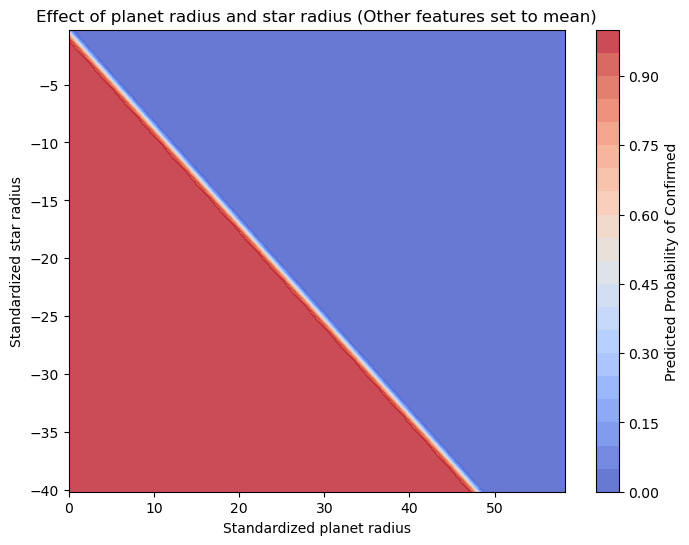

In [85]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.8)
plt.colorbar(contour, label='Predicted Probability of Confirmed')
plt.xlabel('Standardized planet radius')
plt.ylabel('Standardized star radius')
plt.title('Effect of planet radius and star radius (Other features set to mean)')
plt.show()

In [86]:
#We can see that for the observation to have a higher likelihood of being classified as an exoplanet,
#we prefer that the observed stellar radius is not to large for the planetary radius

In [116]:
#Let's try doing this all again looking more carefully at the data!

Conclusions so far: Logistic Regression performs okay at 72% accuracy.
Transit depth and stellar/planetary radii have the largest magnitude coefficients.

If we studied the data more, can we do better, let's see!

In [313]:
import pandas as pd

df = pd.read_csv("cumulative_2025.05.15_00.08.33.csv", comment='#')  # some files have metadata comments
print(df.shape)
#Remove candidate planets
df = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]
#Create a binary is_candidate entry to classify against
df['is_candidate'] = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
features = [
    'koi_period',      # orbital period
    'koi_duration',    # transit duration
    'koi_depth',       # transit depth
    'koi_prad',        # planet radius
    'koi_steff',       # stellar temperature
    'koi_slogg',       # log surface gravity
    'koi_srad'         # stellar radius
]

#Capital X and Y
X = df[features]
Y = df['is_candidate']
#No missing values please!
X = X.dropna()
Y = Y.loc[X.index]
print(X.shape)

(9564, 141)
(7325, 7)


Planetary radius was important earlier, how does it vary?

In [314]:
prad_idx = features.index('koi_prad')
X_nums = np.array(X)
print(X_nums[:, prad_idx].min())
print(X_nums[:, prad_idx].max())

0.08
200346.0


Has a fairly large range, what's the range for the other features look like?

In [315]:
#Planetary Radii vary over an order of magnitude
#How does the range vary for other parameters?
feature_names = [
    'orbital period',
    'transit duration',
    'transit depth',
    'planet radius',
    'stellar temperature',
    'log surface gravity',
    'stellar radius'
]
for feature in features:
    idx = features.index(feature)
    name = feature_names[idx]
    print(name + ':', X_nums[:, idx].min(), '-', X_nums[:, idx].max())

orbital period: 0.241842544 - 1071.232624
transit duration: 0.1046 - 138.54
transit depth: 0.8 - 1541400.0
planet radius: 0.08 - 200346.0
stellar temperature: 2661.0 - 15896.0
log surface gravity: 0.047 - 5.283
stellar radius: 0.116 - 229.908


In [316]:
#The transit depth is a ratio in ppm, how can it have a maximum of more than 1000000 !
#Clearly an outlier/error, so we should remove that

In [317]:
X.shape

(7325, 7)

In [318]:
X_nums = np.array(X)
depth_idx = features.index('koi_depth')
print(X_nums[:, depth_idx].max())

1541400.0


In [319]:
not_outlier = X['koi_depth'] < 1000000
X = X[not_outlier]
Y = Y[not_outlier]

In [320]:
X.shape

(7324, 7)

In [321]:
X_nums = np.array(X)
depth_idx = features.index('koi_depth')
print(X_nums[:, depth_idx].max())
print(X_nums[:, prad_idx].max())

921670.0
200346.0


In [322]:
#Anomaly removed!

In [323]:
for feature in features:
    idx = features.index(feature)
    name = feature_names[idx]
    print(name + ':', X_nums[:, idx].min(), '-', X_nums[:, idx].max())

orbital period: 0.241842544 - 1071.232624
transit duration: 0.1046 - 138.54
transit depth: 0.8 - 921670.0
planet radius: 0.08 - 200346.0
stellar temperature: 2661.0 - 15896.0
log surface gravity: 0.047 - 5.283
stellar radius: 0.116 - 229.908


In [324]:
#Now, since we have a number of features which vary over many orders of magnitude,
#let's try the regression again with a robust scaling

Because of the many features varying over many order of magnitude it seems wise to try robust scaling (uses interquartile range and median instead of standard deviation and mean).

In [339]:
#Let's try logistic regression again!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [326]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [327]:
#sklearn has built in logistic regression, so I use that
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [328]:
#How'd it do!
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7385665529010239
Confusion Matrix:
 [[678 239]
 [144 404]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       917
           1       0.63      0.74      0.68       548

    accuracy                           0.74      1465
   macro avg       0.73      0.74      0.73      1465
weighted avg       0.75      0.74      0.74      1465



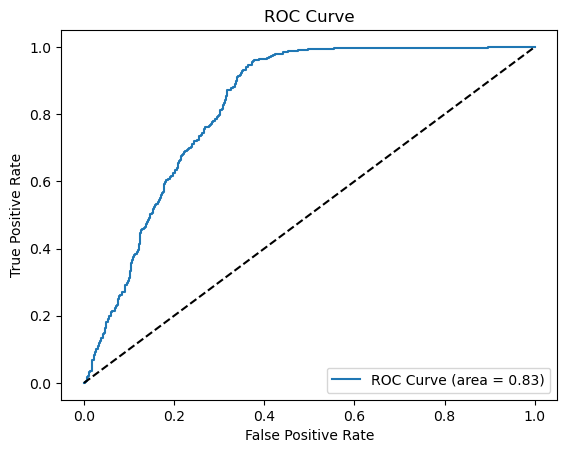

In [329]:
#Here's an ROC curve again
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [330]:
#Now try to figure out which features have the largest weights in the regression
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
})
print(coef_df.sort_values(by="Coefficient", key=abs, ascending=False))

        Feature  Coefficient
3      koi_prad    -2.122615
5     koi_slogg    -1.102713
4     koi_steff    -0.636821
6      koi_srad    -0.623460
1  koi_duration    -0.107741
0    koi_period    -0.102102
2     koi_depth    -0.035225


In [ ]:
#Interestingly, with robust scaling, we find very different coefficients!
#Planetary radius is still important, but now effective temperature and surface gravity
#Are considered more important than the stellar radius of transit depth

In [331]:
#Performs slightly better than the standard (linear) scaling, with a 74% accuracy,
#but otherwise performance not much different

Conclusions: We can find anomalies by looking at the maxima/minima of our ranges for each feature.
Different types of scaling can have some affect on the accuracy, but more significantly,
can have a large affect on which features are prioritised by the regression! 

## XGBoost

In [332]:
#Let's also try XGBoost and see what happens!

In [333]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [334]:
Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9003412969283277
Confusion Matrix:
 [[844  73]
 [ 73 475]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       917
           1       0.87      0.87      0.87       548

    accuracy                           0.90      1465
   macro avg       0.89      0.89      0.89      1465
weighted avg       0.90      0.90      0.90      1465



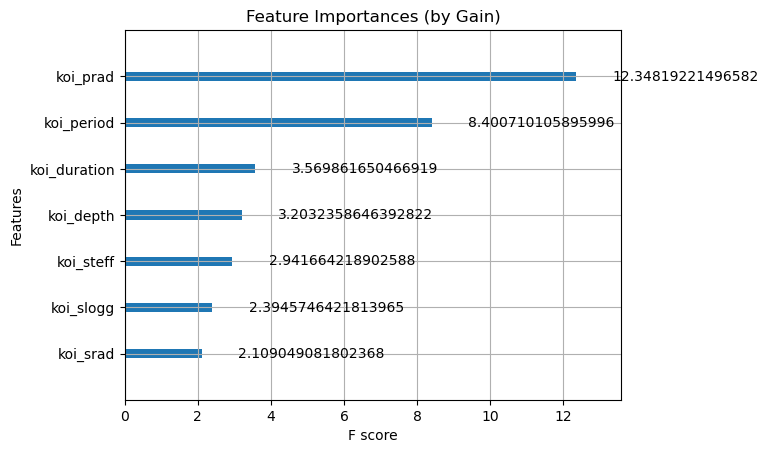

In [335]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, importance_type='gain')
plt.title("Feature Importances (by Gain)")
plt.show()

In [336]:
#Planetary radius is again very important, but now, we find that it's the orbital period and duration of transit
#that are most relevant!

In [337]:
#Overall, Logistic Regressions gives an accuracy of 74% and XGBoost gives an accuracy of 90%
#We consistently find that the planetary radius is the most salient feature across different models

Conclusions: We find that XGBoost performs rather better than the logistic regression, with a 90% accuracy compared to the previous 74% accuracy. Curiously we find that the relevant features have changed again, with the one exception of planetary radius, which is among the most important features for all of the models.

Ideas for next time: Can we try and more systematically find anomalies? How do we go about determining what method of scaling is best for logistic regression in a principled way? Can we interpret more precisely what it means for certain features to have large coefficients in the logistic regression? Also, we should try and implement/program logistic regression and random forest techniques for ourselves!